## Implementasi K-Means dalam Pengelompokan Penyebaran Kemiskinan di Indonesia untuk Pengendalian dan Pemulihan Ekonomi di Daerah Jawa Timur

Oleh : <br>
Nama : Wahyu Rohmatul Abidin<br>
Nim  : 220411100198<br>
Kelas: Proyek Sains Data (D) <br>
projek 3

## 1. Bussiness Understanding

#### 1.1 Latar Belakang
Kemiskinan merupakan sebagai salah satu tantangan terbesar yang dihadapi oleh negara dalam pembangunan yang inklusif dan berkelanjutan. Pemerintah Jawa timur sudah banyak bekerja keras dan mengusahakan untuk tercapainya kehidupan masyarakat yang layak dengan menggunakan beberapa program seperti bantuan sosial dan program program lainnya. Tapi masih banyak kendala yang dihadapi seperti distribusi bantuan yang tidak tepat sasaran pada suatu daerah yang sering kali menjadi kendala yang menjadikan program mengurangi tingkat kemiskinan kurang efektif. Salah satu penyebab utamanya adalah kurangnya pemahaman yang mendalam mengenai distribusi kemiskinan di daerah terutama di kabupaten dan kota di masing masing kabupaten/kota di Jawa timur. <br>

Berdasarkan data dari tahun 2018 – 2024, terlihat bahwa setiap kabupaten atau kota dijawa timur memiliki tingkat kemiskinan yang berbeda beda. Namun, program bantuan dan pemulihan ekonomi cenderung bersifat umum tanpa memperhatikan karakteristik spesifik dari masing masing wilayah. Akibatnya, daerah- daerah yang seharusnya mendapatkan prioritas dalam program bantuan tidak memperoleh alokasi yang memadai, sementara daerah dengan tingkat kemiskinan yang lebih rendah bisa jadi menerima alokasi yang berlebih. <br>

Dengan masalah ini, pengelompokan daerah berdasarkan tingkat kemiskinan dapat menjadi alat yang efektif bagi pemerintah khususnya kementerian social Jawa Timur, dalam merancang dan menargetkan program program pemulihan ekonomi yang tepat sasaran. Dengan menggunakan Teknik clustering/ pengelompokan data dengan menggunakan algoritma K-Means dapat membantu dalam mengidentifikasi kelompok daerah dengan karakteristik kemiskinan yang serupa, yang memungkinkan pemerintah menganggarkan sumber daya yang lebih efisien dan efektif.

#### 1.2 Masalah
1. Bagaimana distribusi garis kemiskinan di kabupaten dan kota di jawa timut selama 2018 - 2024 ?
<br>
2. Bagaimana cara melakukan pengelompokan daerah berdasarkan garis kemiskinan untuk memastikan program bantuan lebih tepat sasaran ?
<br>
3. Bagaimana hasil pengelompokan ini dapat digunakan oleh pemerintah provinsi dalam perencanaan distribusi program bantuan sosial dan pemulihan ekonomi yang lebih efisien ?

#### 1.3 Tujuan
1. Menganalisis garis kemiskinan per kapita per bulan di setiap kabupaten/ kota di jawa timur pada periode 2018 -  2024 <br>

2. Mengidentifikasi pola dan tren distribbusi kemiskinan di jawa timur menggunakan pengelompokan berbasis algoritma K-Means <br>

3. Menerapkan algoritma K-Means dalam mengelompokkan kota-kota di Jawa timur berdasarkan penyebaran kemiskinan dari tahun 2018 hingga 2024. Sehingga menghasilkan peta sebaran kemiskinan dalam tiap tiap cluster. Melalui pengelompokan ini, diharapkan Kementerian Sosial dapat:
<br>
a. Mengidentifikasi kluster kluster daerah dengan tingkat kemiskinan yang serupa. <br>

b. Merancang strategi pengendalian dan pemulihan ekonomi yang lebih tepat sasaran <br>

c. Mengalokasikan anggaran bantuan social (Bansos) sesuai dengan tingkat kemiskinan yang ada di setiap kluster, sehingga program yang dijalankan lebih efektif dalam menurunkan angka kemiskinan daerah daerah yang ada di jawa timur.



#### 1.4 Manfaat
Penelitian ini diharapkan dapat memberikan beberapa manfaat yang signifikan, antara lain : <br><br>


A. Bagi pemerintah ( Kementerian sosial )<br>

1. Mempercepat pemulihan ekonomi di daerah-daerah dengan tingkat kemiskinan tinggi melalui program yang lebih terarah.<br>

2. Memperoleh alat bantu berbasis data untuk pengambilan keputusan dalam distribusi bantuan sosial yang lebih tepat sasaran<br>

3. Menyusun rencana dan strategi daerah mana yang memerlukan intervensi khusus dalam pengendalian dan pemulihan ekonomi serta strategi yang lebih tepat untuk setiap cluster.
<br>
4. Rekomendasi kebijakan berbasis data untuk memastikan bahwa bantuan ekonomi dan sosial terfokus pada daerahdaerah yang paling membutuhkan perhatian khusus.

<br><br>
Bagi Masyarakat

1. Meningkatkan kesejahteraan masyarakat melalui distribusi bantuan sosial dari pemerintah yang lebih merata dan tepat sasaran<br>

2. Meningkatkan pertumbuhan ekonomi yang merata di Indonesia, terutama pada daerah daerah yang paling terdampak oleh kemiskinan.

## 2. EDA

#### 2.1 Import Library

In [14]:
!pip install contextily
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

#### 2.2 Dataset

Data yang digunakan diambil dari https://jatim.bps.go.id/id

Data yang digunakan adalah data cross section. dengan fiturnya ada 3 meliputi indeks keparahan kemiskinan, indeks kedalaman kemiskinan, dan presentase penduduk miskin.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Proyek_sains_data/dataFitur.csv')

In [6]:
data

,nama_Kab/Kota,p1,p2,p0_persen
0,Pacitan,1.49,0.25,13.08
1,Ponorogo,1.02,0.17,9.11
2,Trenggalek,1.43,0.28,10.50
3,Tulungagung,0.60,0.10,6.28
4,Blitar,0.80,0.12,8.16
5,Kediri,1.22,0.24,9.95
6,Malang,0.98,0.16,8.98
7,Lumajang,1.23,0.26,8.65
8,Jember,1.01,0.18,9.01
9,Banyuwangi,0.44,0.06,6.54


In [ ]:
print(data.describe())

              p1         p2  p0_persen
count  38.000000  38.000000  38.000000
mean    1.291053   0.276579   9.782368
std     0.760145   0.252536   4.213447
min     0.420000   0.060000   3.060000
25%     0.825000   0.160000   6.517500
50%     1.055000   0.205000   9.215000
75%     1.505000   0.280000  12.042500
max     4.190000   1.530000  20.830000


In [8]:
#Melihat Dimensi Data
print(data.shape)

(38, 4)


In [10]:
# Rangkuman Statistika
print(data.describe())

              p1         p2  p0_persen
count  38.000000  38.000000  38.000000
mean    1.291053   0.276579   9.782368
std     0.760145   0.252536   4.213447
min     0.420000   0.060000   3.060000
25%     0.825000   0.160000   6.517500
50%     1.055000   0.205000   9.215000
75%     1.505000   0.280000  12.042500
max     4.190000   1.530000  20.830000


In [12]:
#Memeriksa missing value
print(data.isnull().sum())

nama_Kab/Kota    0
p1               0
p2               0
p0_persen        0
dtype: int64


In [16]:
# pengecekan missing value
print(data.isnull().sum())

nama_Kab/Kota    0
p1               0
p2               0
p0_persen        0
dtype: int64


#### 2.3 penjelasan tiap feature

##### 1.indeks kedalaman kemiskinan adalah (Poverty Gap Index/P1)
Ukuran rata-rata kesenjangan
pengeluaran masing-masing penduduk miskin
terhadap garis kemiskinan.
<br>
Semakin kecil nilai poverty gap index, semakin
besar potensi ekonomi untuk dana pengentasan
kemiskinan berdasarkan identifikasi karakteristik
penduduk miskin dan juga untuk target sasaran
bantuan dan program
<br>
Penurunan nilai indeks
Kedalaman Kemiskinan mengindikasikan bahwa
rata-rata pengeluaran penduduk miskin cenderung
makin mendekati garis kemiskinan dan ketimpangan
pengeluaran penduduk miskin juga semakin
menyempit (BPS, 2018)

Rumusnya

$$
P_1 = \frac{1}{n}\sum_{i=1}^{q} \left[ \frac{z - y_i}{z} \right]
$$

P1 =Indeks kedalam kemiskinan<br>
Z =Garis kemiskinan<br>
Y1 =rata-rata pengeluaran perkapita sebulan
penduduk yang berasa di bawah garis kemiskinan
(i=1,2,3,..,q); y1<z<br>
q =banyaknya penduduk yang berada di
bawah garis kemiskinan<br>
n =jumlah penduduk


##### 2. indeks keparahan kemiskinan

Indeks yang memberikan informasi mengenai gambaran penyebaran pengeluaran diantara penduduk miskin.
<br>
mungkin
terdapat kasus bahwa beberapa kelompok penduduk
miskin memiliki insiden kemiskinan yang tinggi
tetapi jurang kemiskinannya (poverty gap) rendah,
sementara kelompok penduduk lain mempunyai
insiden kemiskinan yang rendah tetapi memiliki
jurang kemiskinan yang tinggi bagi penduduk yang
miskin.<br>
Semakin tinggi nilai indeks, semakin tinggi ketimpangan pengeluaran diantara penduduk miskin. <br>
rumus
$$
P_2 = \frac{1}{n}\sum_{i=1}^{q} \left[ \frac{z - y_i}{z} \right]^2
$$

P2 =Indeks keparahan kemiskinan<br>
Z =Garis kemiskinan<br>
Y1 =rata-rata pengeluaran perkapita sebulan
penduduk yang berasa di bawah garis kemiskinan
(i=1,2,3,..,q); y1<z<br>
q =banyaknya penduduk yang berada di
bawah garis kemiskinan<br>
n =jumlah penduduk


##### 3.Presentase penduduk miskin
Headcount
Index/P0) adalah Persentase penduduk miskin yang
berada di bawah garis kemiskinan<br>
Persentase
penduduk miskin yang tinggi menunjukkan bahwa
tingkat kemiskinan di suatu wilayah juga tinggi<br>
rumusnya

$$
P_0 = \frac{1}{n}\sum_{i=1}^{q} \left[ \frac{z - y_i}{z} \right]^0
$$

P0 =Presentase penduduk miskin<br>
Z =Garis kemiskinan<br>
Y1 =rata-rata pengeluaran perkapita sebulan
penduduk yang berasa di bawah garis kemiskinan
(i=1,2,3,..,q); y1<z<br>
q =banyaknya penduduk yang berada di
bawah garis kemiskinan<br>
n =jumlah penduduk


#### 2.4 Korelasi antar variabel

In [ ]:
# Korelasi antar variabel
print(data[['p1', 'p2', 'p0_persen']].corr())

                 p1        p2  p0_persen
p1         1.000000  0.942327   0.864401
p2         0.942327  1.000000   0.675643
p0_persen  0.864401  0.675643   1.000000


<P>Korelasi antara p1 dan p2 0.92327 yang berarti sangat tinggi</P>
<p>Nilai korelasi antara p1 dan p0_persen adalah 0.864 yang berarti tingi dan positif</p>
<p>Nilai korelasi antara p2 dan p0_persen adalah 0.676 yang berarti cukup kuat walaupun tidak sekuat hubungan p1 dan dan p2</P>
<center><b>Panduan Interpretasi Nilai Korelasi:</b></center>
<br>
<b>0.00 hingga ±0.19:</b>
Korelasi sangat rendah atau lemah. Hampir tidak ada hubungan antara dua variabel.

<b>0.20 hingga ±0.39:</b>
Korelasi rendah atau hubungan cukup lemah. Ada hubungan, tetapi tidak kuat.

<b>0.40 hingga ±0.59:</b>
Korelasi sedang. Ada hubungan yang cukup berarti, tetapi tidak terlalu kuat.

<b>0.60 hingga ±0.79:</b>
Korelasi kuat. Ada hubungan yang jelas antara kedua variabel, tetapi tidak sempurna.

<b>0.80 hingga ±1.00:</b>
Korelasi sangat kuat. Hubungan antara dua variabel sangat jelas, mendekati sempurna.

#### 2.5. Visualisasi Data

##### a. Persebaran nilai P1

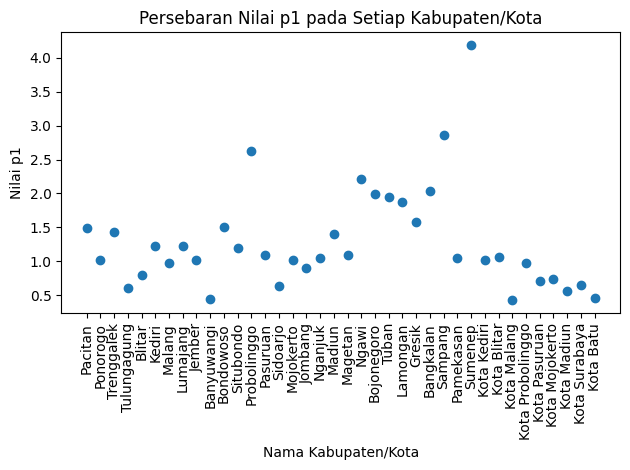

In [17]:
# Import library for plotting
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(data['nama_Kab/Kota'], data['p1'])

# Set labels and title
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Nilai p1')
plt.title('Persebaran Nilai p1 pada Setiap Kabupaten/Kota')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Dari data tersebut dapat dilihat bahwa kabupaten sumenep memiliki indeks kedalaman kemiskinan tertinggi sedangkan kota malang dan kabupaten, kota batu memiliki indeks kemiskinan terendah


##### b. Persebaran Nilai p2

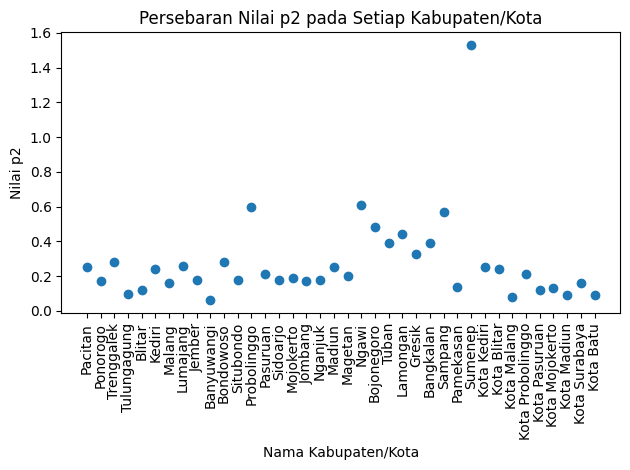

In [19]:
# Create scatter plot
plt.scatter(data['nama_Kab/Kota'], data['p2'])

# Set labels and title
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Nilai p2')
plt.title('Persebaran Nilai p2 pada Setiap Kabupaten/Kota')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Dari data terlihaata bahwa kabupaten sumenep memiliki keparahan kemiskinan tertinggi dan jauh dari rata rata sedangkan kabupaten banyuwangi terendah

##### c. Persebaran Nilai Presentase penduduk miskin

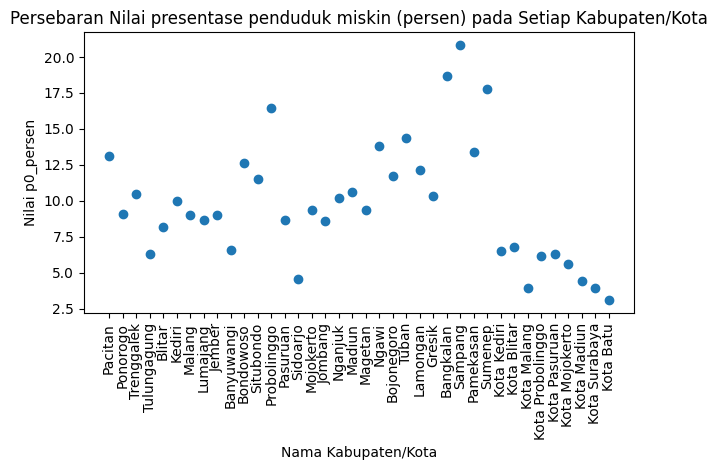

In [20]:
# Create scatter plot
plt.scatter(data['nama_Kab/Kota'], data['p0_persen'])

# Set labels and title
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Nilai p0_persen')
plt.title('Persebaran Nilai presentase penduduk miskin (persen) pada Setiap Kabupaten/Kota')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Dari data tersebut bisa kita lihat bahwa Sumenep masih masuk presentase kemiskinan tertinggi tetapi nilainya masih dalam rata seperti daerah lain sedangkan kota batu memiliki presentase kemiskinan terendah

## 3. Preprocessing

#### 3.1 Normalisasi/Standarisasi

In [22]:
X = data[['p1', 'p2', 'p0_persen']]

In [23]:
# Standarisasi data menggunakan standarisasi Z-score (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[ 0.26523612, -0.10666091,  0.79315033],
       [-0.36136667, -0.4276997 , -0.16171887],
       [ 0.18524428,  0.01372863,  0.17260561],
       [-0.9213096 , -0.70860864, -0.84239389],
       [-0.65467011, -0.62834894, -0.39021401],
       [-0.09472719, -0.14679076,  0.04031895],
       [-0.41469457, -0.46782955, -0.19298662],
       [-0.08139521, -0.06653106, -0.27235862],
       [-0.37469865, -0.38756985, -0.18577099],
       [-1.13462119, -0.86912803, -0.77985837],
       [ 0.29190007,  0.01372863,  0.67770015],
       [-0.13472311, -0.38756985,  0.41553204],
       [ 1.7850812 ,  1.29788378,  1.60370681],
       [-0.26804285, -0.26718031, -0.27716905],
       [-0.8679817 , -0.38756985, -1.263306  ],
       [-0.37469865, -0.34744   , -0.09918335],
       [-0.52135037, -0.4276997 , -0.28438468],
       [-0.33470272, -0.38756985,  0.09323362],
       [ 0.14524835, -0.10666091,  0.20387337],
       [-0.26804285, -0.30731015, -0.11120941],
       [ 1.23847025,  1.33801363,  0.968

## 4. Modelling/**clustering**

#### 4.1 Menentukan jumlah kluster optimal dengan elbow method

K = 1, Inertia = 114.0
K = 2, Inertia = 48.41614615597604
K = 3, Inertia = 33.26675425573549
K = 4, Inertia = 16.31856827207257
K = 5, Inertia = 9.952515053395336
K = 6, Inertia = 8.628918162267343
K = 7, Inertia = 6.473218399892962
K = 8, Inertia = 5.826384904720022
K = 9, Inertia = 4.266983413774368


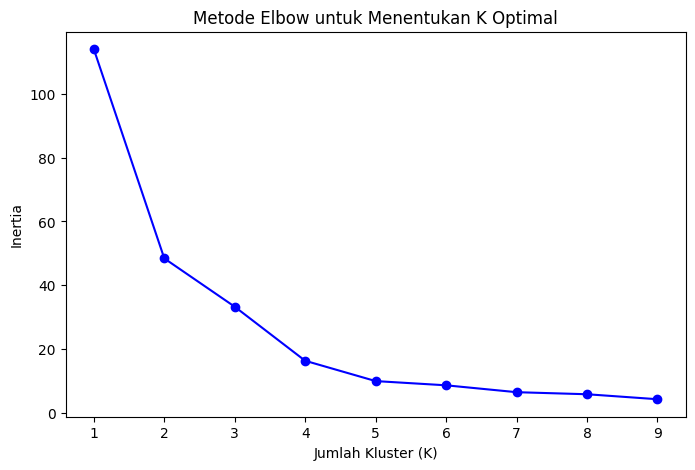

In [26]:
# Menentukan jumlah kluster menggunakan metode Elbow
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print(f"K = {k}, Inertia = {kmeans.inertia_}")

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

Dari data tersebut terlihat data/ nilai inersia mulai stabil ketika sudah mendekati jumlah kluster 3. maka kluster yang dipakai adalah 3

#### 4.2 clustering dengan Kmeans (K=3)

In [36]:
# Melakukan clustering dengan K yang telah ditentukan (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Kluster'] = kmeans.fit_predict(X_scaled)


In [37]:
data

,nama_Kab/Kota,p1,p2,p0_persen,Kluster
0,Pacitan,1.49,0.25,13.08,2
1,Ponorogo,1.02,0.17,9.11,0
2,Trenggalek,1.43,0.28,10.50,2
3,Tulungagung,0.60,0.10,6.28,0
4,Blitar,0.80,0.12,8.16,0
5,Kediri,1.22,0.24,9.95,2
6,Malang,0.98,0.16,8.98,0
7,Lumajang,1.23,0.26,8.65,2
8,Jember,1.01,0.18,9.01,0
9,Banyuwangi,0.44,0.06,6.54,0


## 5. Nilai Akurasi

In [38]:
from sklearn.metrics import silhouette_score

# Assuming 'data' is your DataFrame and 'Kluster' is the column with cluster assignments
# and 'p1', 'p2', 'p0_persen' are the features used for clustering

# Extract features and cluster labels
X = data[['p1', 'p2', 'p0_persen']]
labels = data['Kluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.42478969989357546


Nilai 0.42 adalah cukup baik, namun masih bisa ditingkatkan.
Ini menunjukkan bahwa sebagian besar objek memiliki cluster yang sesuai

## 6. Visualisasi cluster

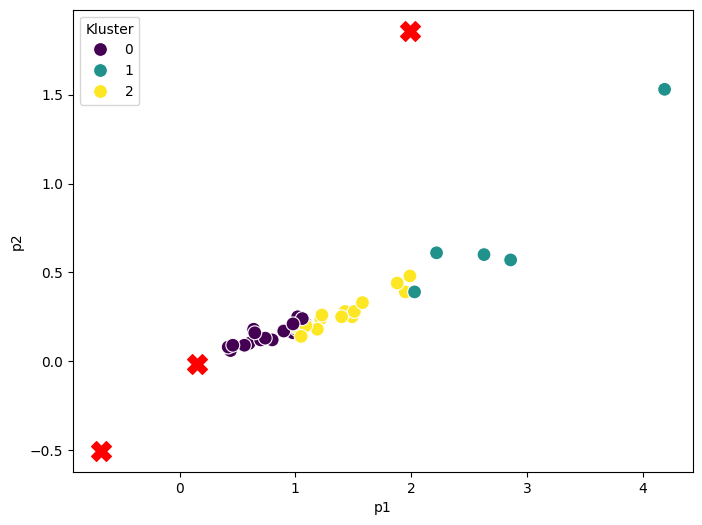

In [39]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Scatter plot untuk dua fitur pertama (P1 vs P2)
sns.scatterplot(
    x=data['p1'],
    y=data['p2'],
    hue=data['Kluster'],
    palette='viridis',
    s=100
)

# Menambahkan centroids
centroids = kmeans.cluster_centers_[:, :2]  # Centroids untuk P1 dan P2
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c='red',
    label='Centroids',
    marker='X'
)

## 7. Kesimpulan

In [40]:
# Group data by cluster and calculate the mean of 'p1', 'p2', and 'p3'
cluster_means = data.groupby('Kluster')[['p1', 'p2', 'p0_persen']].mean()
cluster_means

,p1,p2,p0_persen
Kluster,,,
0,0.781667,0.151111,6.471111
1,2.786000,0.740000,17.506000
2,1.404000,0.272667,11.181333


Kesimpulann berdasarkan nilai rata rata : <br>

 kluster 0 dengan rata rata nilai nya paling kecil maka ini masuk sebagai kategori wilayah cluster kemiskinan yang rendah <br>

kluster 1 dengan nilai rata rata nilai p1,p2,p0Persen tertinggi dapat disimpulkan bahwa daerah yang masuk kluster ini memiliki tingkat kemiskinan tertinggi <br>

Kluster 2 dengan nilai sedang sehingga dapat disimpulkan daerah/kota dalam kluster ini memiliki tingkat kemiskinan sedang





## 8. Deployment hugging face